In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
%matplotlib inline

In [5]:
calorie=pd.read_csv("calories_consumed.csv")

In [6]:
calorie.head()

,Weightgainedingrams,Calorieconsumed
0,108,1500
1,200,2300
2,900,3400
3,200,2200
4,300,2500


In [7]:
calorie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
Weightgainedingrams    14 non-null int64
Calorieconsumed        14 non-null int64
dtypes: int64(2)
memory usage: 304.0 bytes


C:\Users\ayukk22\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


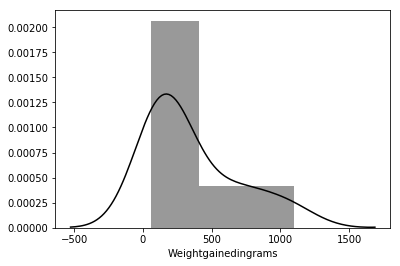

In [8]:
sns.distplot(calorie['Weightgainedingrams'],color='black')

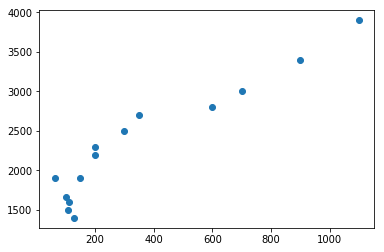

In [9]:
plt.scatter(calorie['Weightgainedingrams'],calorie['Calorieconsumed'])

(array([6., 2., 2., 0., 0., 1., 1., 0., 1., 1.]),
 array([  62. ,  165.8,  269.6,  373.4,  477.2,  581. ,  684.8,  788.6,
         892.4,  996.2, 1100. ]),
 <a list of 10 Patch objects>)

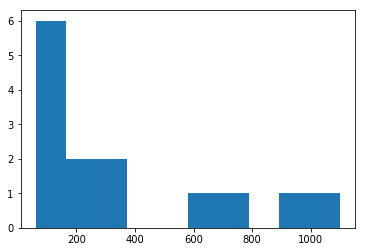

In [10]:
plt.hist(calorie.Weightgainedingrams)

(array([3., 1., 2., 2., 1., 2., 1., 0., 1., 1.]),
 array([1400., 1650., 1900., 2150., 2400., 2650., 2900., 3150., 3400.,
        3650., 3900.]),
 <a list of 10 Patch objects>)

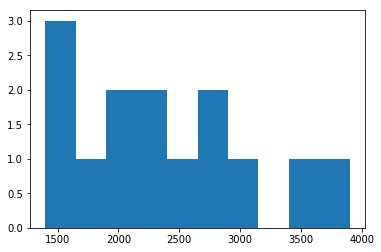

In [11]:
plt.hist(calorie.Calorieconsumed)

In [12]:
calorie.describe()

,Weightgainedingrams,Calorieconsumed
count,14.000000,14.000000
mean,357.714286,2340.714286
std,333.692495,752.109488
min,62.000000,1400.000000
25%,114.500000,1727.500000
50%,200.000000,2250.000000
75%,537.500000,2775.000000
max,1100.000000,3900.000000


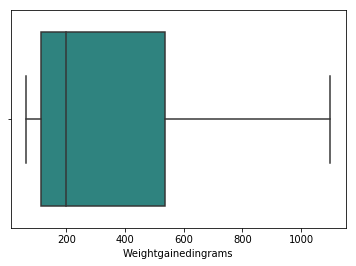

In [13]:
sns.boxplot(calorie['Weightgainedingrams'],color='black',palette ='viridis',orient='h')

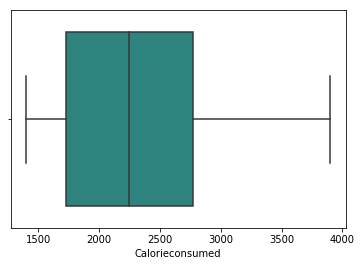

In [14]:
sns.boxplot(calorie['Calorieconsumed'],palette ='viridis',orient='h',color='red')

In [15]:
calorie.corr()

,Weightgainedingrams,Calorieconsumed
Weightgainedingrams,1.000000,0.946991
Calorieconsumed,0.946991,1.000000


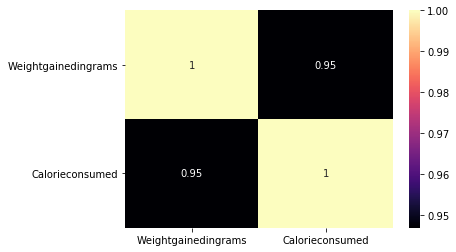

In [16]:
sns.heatmap(calorie.corr(),cmap='magma',annot=True)

In [17]:
calorie['Calorieconsumed'].corr(calorie['Weightgainedingrams'])  #correlation value between X and Y


0.9469910088554458

In [18]:
np.corrcoef(calorie['Calorieconsumed'],calorie['Weightgainedingrams'])

array([[1.        , 0.94699101],
       [0.94699101, 1.        ]])

In [19]:
import statsmodels.formula.api as smf

In [20]:
model=smf.ols('Calorieconsumed~Weightgainedingrams',data=calorie).fit()

In [21]:
model.params   #Getting the Parameters

Intercept              1577.200702
Weightgainedingrams       2.134423
dtype: float64

In [22]:
model.summary()

C:\Users\ayukk22\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Calorieconsumed   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     104.3
Date:                Fri, 29 May 2020   Prob (F-statistic):           2.86e-07
Time:                        16:29:04   Log-Likelihood:                -96.170
No. Observations:                  14   AIC:                             196.3
Df Residuals:                      12   BIC:                             197.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1577.2007    100.541     15.687      0.000    1358.141    1796.260
Weightgainedingrams     2.1344      0.209     10.211      0.000       1.679       2.590
==============================================================================
Omnibus:                        0.254   Durbin-Watson:                   2.308
Prob(Omnibus):                  0.881   Jarque-Bera (JB):                0.425
Skew:                          -0.098   Prob(JB):                        0.808
Kurtosis:                       2.169   Cond. No.                         719.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
model.conf_int(0.05)

,0,1
Intercept,1358.141455,1796.259949
Weightgainedingrams,1.678994,2.589852


In [24]:
prediction = model.predict(calorie)

Text(0,0.5,'Calorieconsumed')

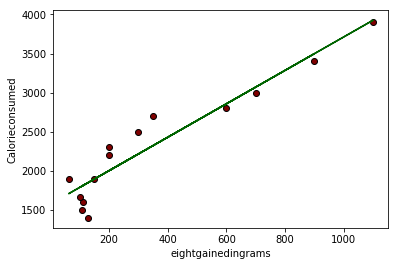

In [25]:
plt.scatter(x=calorie['Weightgainedingrams'],y=calorie['Calorieconsumed'],c='maroon',edgecolors='black')
plt.plot(calorie['Weightgainedingrams'],prediction,color='darkgreen')
plt.xlabel('eightgainedingrams')
plt.ylabel('Calorieconsumed')

In [27]:
prediction.corr(calorie['Calorieconsumed'])

0.9469910088554458

# LOG TRANSFORMATION

In [34]:
model2 = smf.ols('Calorieconsumed~np.log(Weightgainedingrams)',data=calorie).fit()
type(model2)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [35]:
model2.params

Intercept                     -1911.124394
np.log(Weightgainedingrams)     774.173550
dtype: float64

In [36]:
model2.summary()

C:\Users\ayukk22\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Calorieconsumed   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     86.04
Date:                Fri, 29 May 2020   Prob (F-statistic):           8.02e-07
Time:                        16:34:08   Log-Likelihood:                -97.363
No. Observations:                  14   AIC:                             198.7
Df Residuals:                      12   BIC:                             200.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                   -1911.1244    464.188     -4.117      0.001   -2922.503    -899.746
np.log(Weightgainedingrams)   774.1735     83.462      9.276      0.000     592.326     956.021
==============================================================================
Omnibus:                        4.026   Durbin-Watson:                   3.009
Prob(Omnibus):                  0.134   Jarque-Bera (JB):                1.659
Skew:                           0.772   Prob(JB):                        0.436
Kurtosis:                       3.679   Cond. No.                         36.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
model.conf_int(0.01)  # 99% confidence level

,0,1
Intercept,1270.095322,1884.306082
Weightgainedingrams,1.495944,2.772902


In [39]:
prediction2 = model2.predict(calorie)

In [41]:
prediction2.corr(calorie['Calorieconsumed'])
prediction2

0     1713.657759
1     2190.692769
2     3355.109707
3     2190.692769
4     2504.593132
5     1727.863176
6     1845.189099
7     1283.993883
8     3041.209345
9     3510.463652
10    1654.076556
11    1967.976918
12    2623.932511
13    3160.548724
dtype: float64

Text(0,0.5,'Calorieconsumed')

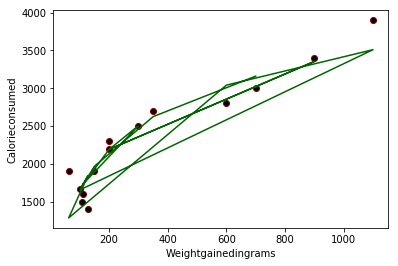

In [47]:
plt.scatter(x=calorie['Weightgainedingrams'],y=calorie['Calorieconsumed'],c='black',edgecolors='maroon')
plt.plot(calorie['Weightgainedingrams'],prediction2,color='darkgreen')
plt.xlabel('Weightgainedingrams')
plt.ylabel('Calorieconsumed')

# EXPONENTIAL TRANSFORMATION

In [51]:
model3 = smf.ols('np.log(Calorieconsumed)~Weightgainedingrams',data=calorie).fit()
type(model3)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [52]:
model3.params

Intercept              7.406838
Weightgainedingrams    0.000852
dtype: float64

In [53]:
model3.summary()

C:\Users\ayukk22\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     np.log(Calorieconsumed)   R-squared:                       0.808
Model:                                 OLS   Adj. R-squared:                  0.792
Method:                      Least Squares   F-statistic:                     50.40
Date:                     Fri, 29 May 2020   Prob (F-statistic):           1.25e-05
Time:                             16:50:05   Log-Likelihood:                 8.3130
No. Observations:                       14   AIC:                            -12.63
Df Residuals:                           12   BIC:                            -11.35
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               7.4068      0.058    128.367      0.000       7.281       7.533
Weightgainedingrams     0.0009      0.000      7.100      0.000       0.001       0.001
==============================================================================
Omnibus:                        0.488   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.783   Jarque-Bera (JB):                0.559
Skew:                          -0.317   Prob(JB):                        0.756
Kurtosis:                       2.254   Cond. No.                         719.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
model3.conf_int(0.01)  #99% Confidence interval

,0,1
Intercept,7.230590,7.583087
Weightgainedingrams,0.000485,0.001218


In [55]:
prediction3 = model3.predict(calorie)
prediction3

0     7.498820
1     7.577174
2     8.173348
3     7.577174
4     7.662342
5     7.500523
6     7.515853
7     7.459642
8     7.917845
9     8.343684
10    7.492006
11    7.534590
12    7.704926
13    8.003013
dtype: float64

In [56]:
predict_3 = np.exp(prediction3)
predict_3

0     1805.909334
1     1953.101471
2     3545.194617
3     1953.101471
4     2126.731695
5     1808.988061
6     1836.933870
7     1736.526880
8     2745.847366
9     4203.546672
10    1793.646733
11    1871.676808
12    2219.252162
13    2989.952498
dtype: float64

In [57]:
predict_3.corr(calorie['Calorieconsumed'])

0.9306443934300495

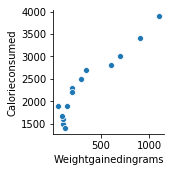

In [58]:
sns.pairplot(data=calorie,x_vars='Weightgainedingrams',y_vars='Calorieconsumed')

Text(0,0.5,'Calorieconsumed')

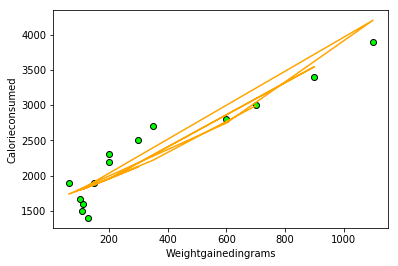

In [60]:
plt.scatter(calorie['Weightgainedingrams'],calorie['Calorieconsumed'],color='lime',edgecolors='black')
plt.plot(calorie['Weightgainedingrams'],predict_3,color='orange')
plt.xlabel('Weightgainedingrams')
plt.ylabel('Calorieconsumed')

In [61]:
a = predict_3 -calorie['Calorieconsumed']

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
mae = metrics.mean_absolute_error(calorie['Calorieconsumed'], predict_3)
mae

230.5734953662498

In [64]:
mse = metrics.mean_squared_error(calorie['Calorieconsumed'], predict_3)
mse

74213.04416577666

In [65]:
rmse = np.sqrt(metrics.mean_squared_error(calorie['Calorieconsumed'], predict_3))
rmse

272.4207117048494